In [ ]:
# Por si alguien corre en python2
from __future__ import division

import math
import numpy as np
import pandas as pd
from scipy.stats import binom, beta, uniform, norm, bernoulli, dirichlet

from matplotlib import pyplot as plt
%matplotlib inline

# Ejercicio 5: A/B Testing

Te contratan como diseñador de sitios web para una prestigiosa revista amarillista. Tu principal tarea es rediseñar el sitio para obtener más suscriptores. Luego de retoques y maquillajes, crees que esta lista, pero antes de hacerla oficial tu jefe quiere que realices un experimento para estimar qué tanto mejor (si es que lo es en absoluto) es tu diseño, respecto al anterior. 

Se realiza el siguiente experimento: Al 20% de los visitantes se les muestra tu novedoso diseño (diseño A) mientras que al resto se les muestra el diseño original (diseño B). Luego de un mes, cuentas con los siguientes datos:

|Sitio:|A|B|
|---|---|---|
|Cantidad de visitantes  | 14 400  | 57 600  |
|Cantidad de suscriptores| 20  |  68 |

***

##  a)

**Modele la probabilidad $p$ de que un visitante al sitio web se suscriba a la revista (i.e. la _Verosimilitud_ o _Likelihood_). ¿Qué distribución utilizaría y porqué?**


Mi experimento es entran $N_{A,B}$ personas y se suscriben $k_{A,B}$. Estas $N_{A,B}$ personas se comportan independientemente las unas de las otras y todas tienen la misma probabilidad de suscribirse.  Estas hipotesis sumadas al hecho de que la suscripcion es un resultado binario, utilizamos la binomial:

$p_{A,B} = p(k_{A,B}\text{ suscriptores} |N_{A,B} \text{ visitantes}, \mu_{A,B})=\text{Bin}(k_{A,B}|N_{A,B},\mu_{A,B})$

## b)
**Si llamamos $\mu_A$ y $\mu_B$ a dichas probabilidades cuando el visitante es mostrado el diseño A o el diseño B, modele la confianza que tiene en los valores de $\mu_A$ y $\mu_B$ antes de realizar el experimento (i.e. el _prior_). ¿Qué distribución usa?**


Tanto $\mu_{A}$ como $\mu_{B}$ pueden tomar cualquier valor en [0,1]. Como no conozco nada, tomo
$p(\mu_{A,B}) = \text{Uniforme}=\text{Beta}(\mu_{A,B}|\alpha_{1}=1,\alpha_{2}=1)$

## c)
**Utilice el Teorema de Bayes para estimar la confianza que tiene en los parámetros $\mu_A$ y $\mu_B$ luego de realizar el experimento (i.e. el _posterior_). Grafíquelas en función del valor de $\mu$.**

_Ayuda: Esto se puede hacer analiticamente si su verosimilitud y su prior son conjugados, por ejemplo Beta$(1,1)\times$Binomial(X positivos de N intentos) ~ Beta(1+X, 1+N-X)._


__Cargo mis datos:__

In [ ]:
NA=14400
kA=20
NB=57600
kB=68

In [ ]:
MLA=print(kA/NA)
MLB=print(kB/NB)

0.001388888888888889
0.0011805555555555556


__Los incorporo junto a mi prior y obtengo el posterior:__

$p(\mu_{A,B}|k_{A,B},N_{A,B})=\frac{p(k_{A,B}|N_{A,B},\mu_{A,B})p(\mu_{A,B})}{p(k_{A,B}|N_{A,B})}$

Gracias a las propiedades del prior conjugado _para mi eleccion de prior_

$p(\mu_{A,B}|k_{A,B},N_{A,B})=\text{Beta}(\mu_{A,B}|1+k_{A,B},1+N_{A,B}-k_{A,B})$

Text(0.5, 0, '$\\mu$')

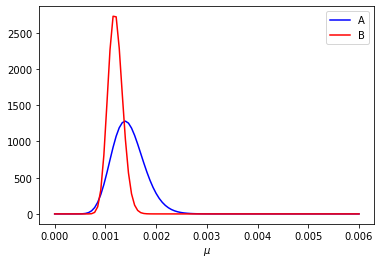

In [ ]:
mu=np.linspace(0,0.006,100)
posteriorA=beta(1+kA,1+NA-kA)
plt.plot(mu,posteriorA.pdf(mu),color='blue',label='A')
posteriorB=beta(1+kB,1+NB-kB)
plt.plot(mu,posteriorB.pdf(mu),color='red',label='B')
plt.legend(loc='upper right')
plt.xlabel('$\mu$')

## d)
**¿Cual es la probabilidad de que el diseño A sea mejor que el B? (Recuerde que un 50% quiere decir que son estadisticamente iguales)**


Opcion a) __Estimadores__

Calculo algun estimador para cada distribucion y comparo.

__Media:__

$E[x]=\int x f(x)dx \approx \frac{1}{M} \sum_{i=1}^{M}x_{i}$

Si sampleo $x$ de manera uniforme

$E[x] \approx \frac{\sum_{i=1}^{M'}x_{i}f(x_{i})}{\sum_{j=1}^{M'}f(x_{j})}$

En general $M' \gg M$ para igualar precision.

In [ ]:
print("La media es: %.6f" % (posteriorA.mean()))
print((kA+1)/(NA+2))
print("Sampleando:")
sample_size = 1000 #Muchas, para que no tengamos errores de binneo numerico
sample_A = posteriorA.rvs(size=sample_size)
print(np.mean(sample_A))

La media es: 0.001458
0.0014581308151645604
Sampleando:
0.0014556302163555455


In [ ]:
print("La media es: %.6f" % (posteriorB.mean()))
print("Sampleando:")
sample_size = 1000 #Muchas, para que no tengamos errores de binneo numerico
sample_B = posteriorB.rvs(size=sample_size)
print(np.mean(sample_B))

La media es: 0.001198
Sampleando:
0.0012082888728466338


La diferencia entre ambas:

In [ ]:
(posteriorA.mean()-posteriorB.mean())/(posteriorB.mean())

0.21726451036389857

Hagan lo mismo para la mediana y para el maximo.

Opcion b): __Es utilizar todo el posterior.__

Sampleo $M$ experimentos y comparo en cuantos tengo mas probabilidad de exito en A que en B.

Si yo tengo $M_{1}$ experimentos donde $\mu_{A} > \mu_{B}$ entonces

$p(\mu_A>\mu_B)=\frac{M_{1}}{M}$

In [ ]:
sample_size=10000
sample_A=posteriorA.rvs(sample_size)
sample_B=posteriorB.rvs(sample_size)

print((sample_A>sample_B).mean())

0.7683


## e)
**Si el sitio cuenta con un promedio de 5 millones de visitas anuales, ¿cuánto estima que será el incremento en los suscriptores el proximo año debido a usar el diseño nuevo en vez del original?**



El incremento en suscriptores va a venir de  considerar $p(k \text{ subscriptores}|5\cdot10^6 \text{ visitantes},\text{sitio web}_{A,B})$

$p(k|N,\text{web}_{A,B})=\int p(k|N,\mu)p(\mu|\text{web}_{A,B}) d\mu$

$p(\mu|\text{web}_{A,B})$ son los posteriors que obtuvimos antes.

__Primer aproximacion:__

Aproximo $p(\mu|web_{A,B})$ por $\delta(\mu_{A,B}-\hat{\mu}_{A,B})$

$p(k|N,\text{web}_{A,B})= p(k|N,\hat{\mu}_{A,B})$


In [ ]:
estimador_A=posteriorA.mean()
estimador_B=posteriorB.mean()
N=5000000
probA=binom(N,p=estimador_A)
probB=binom(N,p=estimador_B)
print((probA.mean(),probB.mean()))

(7290.654075822802, 5989.3753689108025)


__Segunda aproximacion:__

Sampleo adecuadamente y tengo

$p(k|N,\text{web}_{A,B})=\frac{1}{M}\sum_{i=1}^{M}p(k|N,\mu_{i})$

Se que $E[k]=N\mu$ para un $\mu$ fijo

$E[k]=\frac{1}{M}\sum_{i=1}^{M}\sum_{k=0}^{N}p(k|N,\mu_{i})=\frac{1}{M}\sum_{i=1}^{M}N\mu_{i}$

In [ ]:
sample_size=10000
sample_A=posteriorA.rvs(sample_size)
sample_B=posteriorB.rvs(sample_size)
print((binom(N,sample_A).mean()).mean())
print((binom(N,sample_B).mean()).mean())
print((N*sample_A).mean())
print((N*sample_B).mean())

7316.151521669909
5983.218784641789
7316.151521669909
5983.218784641789


# Ejercicio 6: Multinomial

Supongamos que has diseñado un nuevo test para una enfermedad. Ahora hay que caracterizarlo. Para esto, se suele subdividir el espacio de posibilidades en 4:

*   Verdadero Positivo: El test da positivo en un paciente enfermo.
*   Falso Positivo: El test da positivo en un paciente sano.
*   Verdadero Negativo: El test da negativo en un paciente sano
*   Falso Negativo: El test da negativo en un paciente enfermo.

Dado que cualquier paciente puede estar o sano o enfermo, y que el test solo puede dar positivo o negativo, estos cuatro eventos completan el espacio de posibilidades y son excluyentes. De este modo se caracteriza el test con las probabilidades de cada uno de estos eventos.

¿Como modelaría estas probabilidades? ¿Qué distribución de probabilidad le parece apropiada?

El espacio de muestreo tiene dimension 4:

$S=(TP,FP,TN,FN)$

Sampleo $N$ veces un paciente testeado. Cual es la probabilidad de tener $k_{1}$ TP, $k_{2}$ FP, $k_{3}$ TN y $k_{4}$ FN? Es la Multinomial

$\text{Multi}(k_{1},k_{2},k_{3},k_{4}|N,\mu_{1},\mu_{2},\mu_{3},\mu_{4})=\frac{N!}{k_{1}!k_{2}!k_{3}!k_{4}!}\mu_{1}^{k_{1}}\mu_{2}^{k_{2}}\mu_{3}^{k_{3}}\mu_{4}^{k_{4}}$

$k_{1}+k_{2}+k_{3}+k_{4}=N$

$\mu_{1}+\mu_{2}+\mu_{3}+\mu_{4}=1$

In [ ]:
from scipy.stats import multinomial
#multinomial(n,[p1,p2,p3,p4])

En el archivo datasets/clinical_trials.csv se encuentran los resultados de las pruebas médicas realizadas. A partir de ellos, y asumiendo ningún conocimiento previo (prior uniforme), realice inferencia Bayesiana sobre las probabilidades del modelo. Grafique los posteriors correspondientes, y reporte un valor (estimador) para ellos. Justifique porque eligió dicho estimador. **Hint:** No hay una única respuesta adecuada.

In [ ]:
#Si estas en Colab, ejecuta esto primero:
!mkdir datasets
!wget https://raw.githubusercontent.com/IAI-UNSAM/ML_UNSAM/master/datasets/clinical_trials.csv
!mv clinical_trials.csv datasets/clinical_trials.csv

mkdir: cannot create directory ‘datasets’: File exists
--2020-08-25 20:35:41--  https://raw.githubusercontent.com/IAI-UNSAM/ML_UNSAM/master/datasets/clinical_trials.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63954 (62K) [text/plain]
Saving to: ‘clinical_trials.csv’

clinical_trials.csv 100%[===================>]  62.46K  --.-KB/s    in 0.03s   

2020-08-25 20:35:42 (2.27 MB/s) - ‘clinical_trials.csv’ saved [63954/63954]



In [ ]:
df = pd.read_csv('datasets/clinical_trials.csv', index_col='PatientID')
df.head()

,TruePositive,FalsePositive,TrueNegative,FalseNegative
PatientID,,,,
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [ ]:
alphas = df.sum(axis=0)
print(alphas)
alphas = np.array(alphas)

TruePositive       45
FalsePositive     430
TrueNegative     4499
FalseNegative      26
dtype: int64


Mi teorema de Bayes:

$p(\mu_1,\mu_2,\mu_3,\mu_4|N,k_1,k_2,k_3,k_4)=\frac{p(k_1,k_2,k_3,k_4|N,\mu_1,\mu_2,\mu_3,\mu_4)p(\mu_1,\mu_2,\mu_3,\mu_4)}{p(k_1,k_2,k_3,k_4|N)}$

Yo se la verosimilitud:
$p(\mu_1,\mu_2,\mu_3,\mu_4|N,k_1,k_2,k_3,k_4)=\frac{\text{Multi}(k_1,k_2,k_3,k_4|N,\mu_1,\mu_2,\mu_3,\mu_4)p(\mu_1,\mu_2,\mu_3,\mu_4)}{p(k_1,k_2,k_3,k_4|N)}$

Voy a tomar prior uniforme dado que no tengo conocimiento sobre los $\mu$. Tomo la generalizacion de la Beta, la distribucion de Dirichlet.

$\text{Dirichlet}(\mu_{1},\mu_{2},\mu_{3},\mu_{4}|\alpha_{1},\alpha_{2},\alpha_{3},\alpha_{4})$

Esta definida sobre un espacio K-1 dimensional. Siempre que samplee se va a cumplir que $\sum_{i=1}^{K}\mu_{i}=1$.

En particular Dirichlet(1,1,1,...,1) es la distribucion uniforme.

In [ ]:
from scipy.stats import dirichlet
prioruniforme=dirichlet(alpha=[1,1,1,1])
mu=prioruniforme.rvs(10)
print(mu)
print(np.sum(mu,axis=1))

[[0.11112054 0.21456679 0.64284181 0.03147086]
 [0.29231571 0.17422047 0.40214643 0.13131738]
 [0.29383596 0.03725986 0.3197936  0.34911059]
 [0.11330138 0.06129195 0.0418652  0.78354147]
 [0.11869774 0.11977796 0.72722356 0.03430074]
 [0.33792864 0.29130812 0.21483435 0.15592889]
 [0.38310371 0.21747808 0.30438516 0.09503305]
 [0.01791288 0.03946517 0.5958579  0.34676405]
 [0.13457303 0.34294429 0.29735982 0.22512286]
 [0.56629349 0.07527385 0.10940764 0.24902502]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


El posterior sera $\text{Dirichlet}(\alpha_{1}+k_{1},\alpha_{2}+k_{2},\alpha_{3}+k_{3},\alpha_{4}+k_{4})$

In [ ]:
posterior=dirichlet(alpha=alphas+np.ones(4))

Como estimador puedo considerar la media

In [ ]:
posterior.mean()

array([0.00919265, 0.0861311 , 0.89928058, 0.00539568])

Para graficar, tengo un problema y es que tengo demasiadas dimensiones.

Puedo marginalizar para plottear.

$p(\mu_{1})=\int p(\mu_1,\mu_2,\mu_3,1-\mu_1-\mu_2-\mu_3)d\mu_2 d\mu_3$

Numericamente:

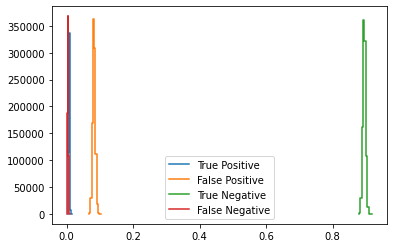

In [ ]:
sample_size = 100**3 #el espacio tiene 3 dimensiones, de esta forma tenemos approx mil por dimension

samples = posterior.rvs(size=sample_size)

histogram, bins = np.histogramdd(samples)

plt.step(bins[0][:-1], histogram.sum(axis=(1,2,3)), label ='True Positive')
plt.step(bins[1][:-1], histogram.sum(axis=(0,2,3)), label ='False Positive')
plt.step(bins[2][:-1], histogram.sum(axis=(0,1,3)), label ='True Negative')
plt.step(bins[3][:-1], histogram.sum(axis=(0,1,2)), label ='False Negative')
plt.legend()

Usted se realiza dicho test y da positivo. Utilizando la información anterior ¿Cuál es la probabilidad de que estés enfermo?

**DATO:** En la muestra de los resultados anteriores, la población enferma estaba sobrerepresentada para obtener una mejor estimación de falsos negativos y verdaderos positivos. Suponga que la probabilidad real de que alguien en su condición tenga la enfermedad es del 0.1%.

¿Cambia el resultado anterior si utilizas las distribuciones de posterior en lugar de los estimadores escogidos? ¿Porqué?